In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

from keras.datasets import mnist
#from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical

#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [13]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [15]:
x_train.shape

(60000, 28, 28)

In [17]:
x_test.shape

(10000, 28, 28)

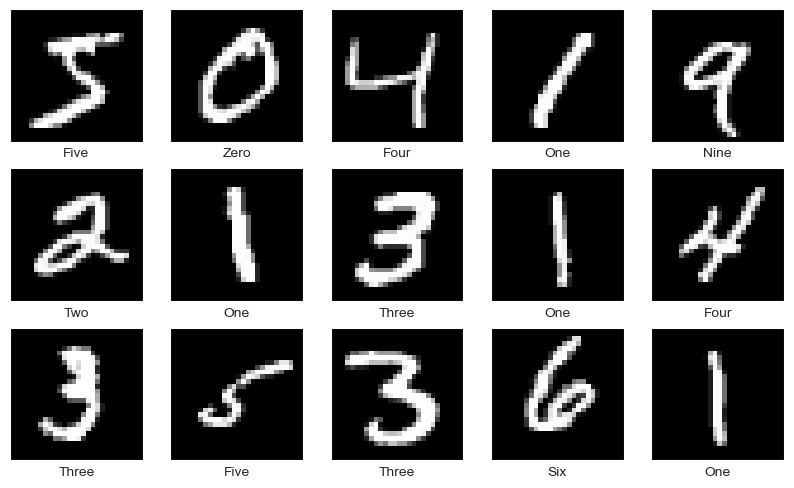

In [251]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(col_names[y_train[i]])
plt.show()

In [25]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [21]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [29]:
x_train /= 255
x_test /= 255

In [35]:
model = Sequential()

# Convolutional process
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))# 28 = no.of filters
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

#neural network NN process
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         605,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 607,394 (2.32 MB)

 Trainable params: 607,394 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
#model.compile(optimizer='adam',loss='sparse_categorical_crossentrophy',metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [209]:
history = model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9978 - loss: 0.0072
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9973 - loss: 0.0085
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9973 - loss: 0.0083
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - accuracy: 0.9973 - loss: 0.0095
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9973 - loss: 0.0098
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9976 - loss: 0.0087
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9975 - loss: 0.0080
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9976 - loss: 0.0091
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.9981 - loss: 0.0065
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9976 - loss: 0.0078


In [211]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9827 - loss: 0.1451


[0.11876317113637924, 0.9854999780654907]

In [213]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [215]:
y_predict = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [216]:
y_predict

array([[1.6200724e-24, 3.0621562e-35, 7.0143649e-22, ..., 1.0000000e+00,
        3.0656324e-24, 3.8239831e-24],
       [9.1675311e-30, 9.4400774e-16, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.8814004e-24, 1.0000000e+00, 1.1714160e-18, ..., 9.6386766e-14,
        1.6814383e-15, 1.1543307e-22],
       ...,
       [0.0000000e+00, 4.9444501e-32, 0.0000000e+00, ..., 4.3058496e-26,
        1.8920002e-22, 1.3937566e-19],
       [1.8844475e-34, 9.0527118e-37, 0.0000000e+00, ..., 0.0000000e+00,
        2.4498297e-16, 0.0000000e+00],
       [1.4117136e-35, 0.0000000e+00, 6.2142603e-31, ..., 0.0000000e+00,
        5.0081345e-33, 0.0000000e+00]], dtype=float32)

In [189]:
y_predicts = np.argmax(y_predict,axis=1)
y_test_eval = y_test


In [191]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [219]:
y_test_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

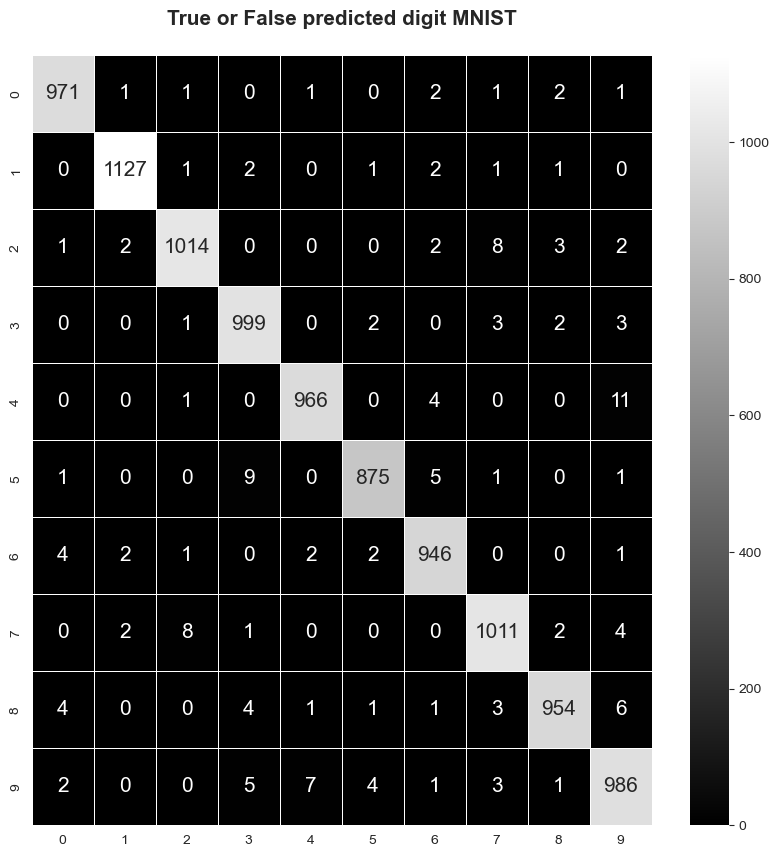

In [221]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_eval,y_predicts)
#plt.style.use('seaborn-deep')
sns.set_style("darkgrid")        # Or "white", "ticks", etc.
sns.set_palette("deep")   
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [223]:
from sklearn.metrics import classification_report
print(classification_report(y_test_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [225]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


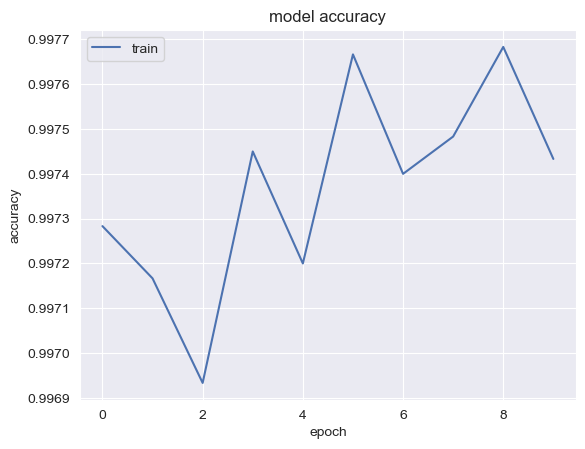

In [229]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

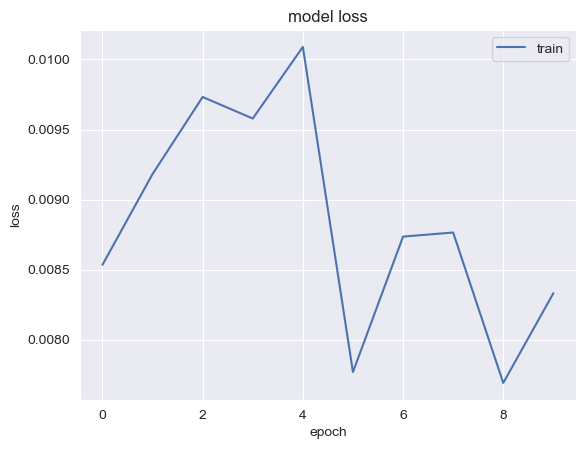

In [233]:
 # summarize history for accuracy
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [235]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(x_test[[6900]])
y_predicts_single = np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_eval = y_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [237]:
y_predict_single

array([[1.1031355e-29, 0.0000000e+00, 0.0000000e+00, 1.7845655e-36,
        3.2562680e-35, 2.3936493e-28, 1.0000000e+00, 0.0000000e+00,
        6.4363435e-32, 0.0000000e+00]], dtype=float32)

In [239]:
y_predicts_single

array([6], dtype=int64)

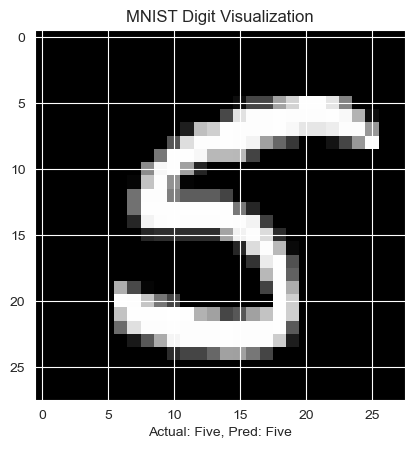

In [249]:

index = 6908  # Choose any test sample index

# Name map for digits
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

# Plot the image
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')

# Predicted and actual labels
actual_label = col_names[y_test_eval[index]]          # Use evaluated/tested label
predicted_label = col_names[y_predicts[index]]        # Predicted label from model

# Add label
plt.xlabel(f"Actual: {actual_label}, Pred: {predicted_label}")
plt.title("MNIST Digit Visualization")
plt.show()